<a href="https://colab.research.google.com/github/liams-code/liams-coding/blob/main/stxAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 6.2 MB/s 


In [ ]:
import pyupbit

In [ ]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-STX", interval="minute240")
df

,open,high,low,close,volume,value
2022-01-12 13:00:00,2520.0,2535.0,2500.0,2500.0,1.526246e+06,3.844217e+09
2022-01-12 17:00:00,2500.0,2590.0,2490.0,2565.0,3.234216e+06,8.231735e+09
2022-01-12 21:00:00,2565.0,2670.0,2555.0,2605.0,7.316375e+06,1.916680e+10
2022-01-13 01:00:00,2600.0,2635.0,2580.0,2615.0,1.314377e+06,3.423037e+09
2022-01-13 05:00:00,2615.0,2670.0,2615.0,2645.0,1.737843e+06,4.595652e+09
...,...,...,...,...,...,...
2022-02-14 01:00:00,1860.0,1860.0,1800.0,1805.0,8.293904e+05,1.513054e+09
2022-02-14 05:00:00,1805.0,1840.0,1785.0,1795.0,1.313142e+06,2.382236e+09
2022-02-14 09:00:00,1795.0,1830.0,1735.0,1770.0,3.269538e+06,5.804766e+09
2022-02-14 13:00:00,1765.0,1770.0,1730.0,1760.0,1.507247e+06,2.632915e+09


In [ ]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-01-12 13:00:00,2500.0
1,2022-01-12 17:00:00,2565.0
2,2022-01-12 21:00:00,2605.0
3,2022-01-13 01:00:00,2615.0
4,2022-01-13 05:00:00,2645.0
...,...,...
195,2022-02-14 01:00:00,1805.0
196,2022-02-14 05:00:00,1795.0
197,2022-02-14 09:00:00,1770.0
198,2022-02-14 13:00:00,1760.0


In [ ]:
#prophet 불러옴
from fbprophet import Prophet

In [ ]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

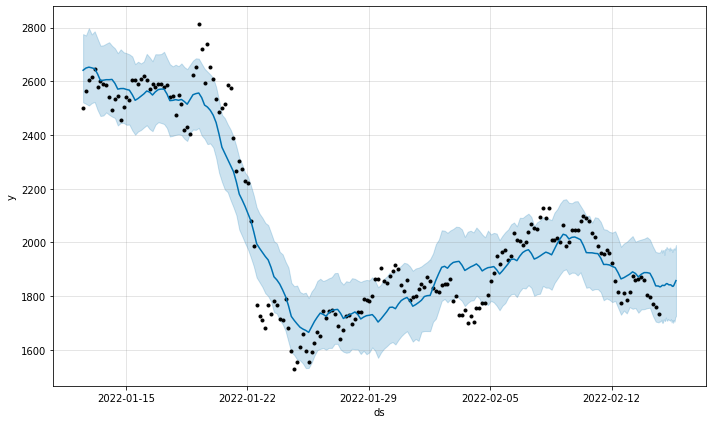

In [ ]:
#그래프1
fig1 = model.plot(forecast)